<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/main/Exercises/day-6/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ETL Lab Exercise: Wine Quality Dataset

## Problem Statement

In this exercise, you will build an end-to-end ETL (Extract-Transform-Load) pipeline using the public "Wine Quality" dataset from the UCI Machine Learning Repository. All work will be done in Google Colab using only local resources.

---

## Tasks

### 1. Extract
- **Download:**  
  Download the "Wine Quality - Red" dataset directly from this URL:  
  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
- **Load:**  
  Load the CSV file into a pandas DataFrame, specifying the separator (`;`).

### 2. Transform
- **Clean:**  
  - Check for and handle any missing or anomalous values.
  - Rename columns for better readability, if desired.
- **Feature Engineering:**  
  - Classify each wine as "High Quality" if its `quality` score is 7 or higher, otherwise "Low/Medium Quality."
  - Normalize numerical features for further analysis.
  - (Optional) Create a feature representing the sum of acidity levels (`fixed acidity` + `volatile acidity`).

### 3. Load
- **SQLite Storage:**  
  Store the transformed DataFrame into a local SQLite database in Colab.
- **SQL Queries:**  
  - Count the number of high and low/medium quality wines.
  - Find the average alcohol percentage by wine quality group.
  - Identify the top 5 wines (rows) with the highest alcohol content.

---

## Constraints

- Use only pandas, Python standard library, and SQLite—all within Google Colab.
- Do **not** use any external or cloud database services.

---

## Dataset

- **Wine Quality Red CSV:**  
  [https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)

---

## Example Challenge Questions

- What percentage of red wines are classified as high quality?
- Which parameter most strongly correlates with wine quality in this sample?
- What is the distribution of alcohol content among different quality groups?

---

**Expected Outcome:**  
You’ll successfully practice ETL skills on a benchmark dataset: from real-world-style data ingestion, cleaning, and enrichment, to local SQL storage and querying for analytics—all inside Colab.

In [5]:
# A. Extract
# 1. Download the Wine Quality Red dataset
import requests
!pip install wget
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
import wget
wget.download(url, 'winequality-red.csv')

'winequality-red.csv'

In [6]:
# 2. Load the CSV file into a pandas DataFrame
import pandas as pd
df_wine = pd.read_csv('winequality-red.csv', sep=';')
print(df_wine.head())
print(df_wine.columns)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [15]:
# B. Transform
# 1. Clean the data
# Check for missing values
print(df_wine.isnull().sum())
df_wine.columns = [col.strip().replace(' ', '_') for col in df_wine.columns]
df_wine.drop_duplicates(inplace=True)
print(df_wine.head())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_class           0
total_acidity           0
dtype: int64
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
5       0.247788          0.369863         0.00        0.061644   0.105175   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725

In [9]:
# 2. Feature Engineering
# Classify wines as "High Quality" or "Low/Medium Quality"
df_wine['quality_class'] = df_wine['quality'].apply(lambda x: 'High Quality' if x >= 7 else 'Low/Medium Quality')

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = df_wine.select_dtypes(include=['float64', 'int64']).columns
df_wine[numerical_cols] = scaler.fit_transform(df_wine[numerical_cols])

df_wine['total_acidity'] = df_wine['fixed_acidity'] + df_wine['volatile_acidity']
print(df_wine.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
5       0.247788          0.369863         0.00        0.061644   0.105175   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
5             0.169014              0.120141  0.567548  0.606299   0.137725   

    alcohol  quality       quality_class  total_acidity 

In [10]:
# C. Load
# 1. Store the transformed DataFrame into a local SQLite database
import sqlite3
conn = sqlite3.connect('wine_quality_etl_lab.db')
df_wine.to_sql('wine_quality', conn, if_exists='replace', index=False)

1359

In [14]:
# 2. Run SQL Queries on the Transformed Data
# Count the number of high and low/medium quality wines
query_quality_count = """
SELECT quality_class, COUNT(*) AS count
FROM wine_quality
GROUP BY quality_class;
"""
df_quality_count = pd.read_sql(query_quality_count, conn)
print(df_quality_count)

        quality_class  count
0        High Quality    184
1  Low/Medium Quality   1175


In [12]:
# Find the average alcohol percentage by wine quality group
query_avg_alcohol = """
SELECT quality_class, AVG(alcohol) AS avg_alcohol
FROM wine_quality
GROUP BY quality_class;
"""
df_avg_alcohol = pd.read_sql(query_avg_alcohol, conn)
print(df_avg_alcohol)

        quality_class  avg_alcohol
0        High Quality     0.485047
1  Low/Medium Quality     0.285669


In [17]:
# Identify the top 5 wines with the highest alcohol content
query_top_alcohol = """
SELECT *
FROM wine_quality
ORDER BY alcohol DESC
LIMIT 5;
"""
df_top_alcohol = pd.read_sql(query_top_alcohol, conn)
print(df_top_alcohol)

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       1.000000          0.164384         0.65        0.452055   0.140234   
1       0.053097          0.150685         0.00        0.061644   0.063439   
2       0.371681          0.232877         0.45        0.116438   0.088481   
3       0.035398          0.205479         0.24        0.075342   0.080134   
4       0.026549          0.205479         0.00        0.082192   0.060100   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0             0.295775              0.229682  0.552863  0.188976   0.305389   
1             0.366197              0.201413  0.112335  0.740157   0.275449   
2             0.084507              0.042403  0.339941  0.456693   0.275449   
3             0.253521              0.155477  0.119677  0.771654   0.245509   
4             0.211268              0.127208  0.107930  0.763780   0.245509   

    alcohol  quality       quality_class  total_acidity 

Text(0, 0.5, 'Average Alcohol Content')

<Figure size 1000x600 with 0 Axes>

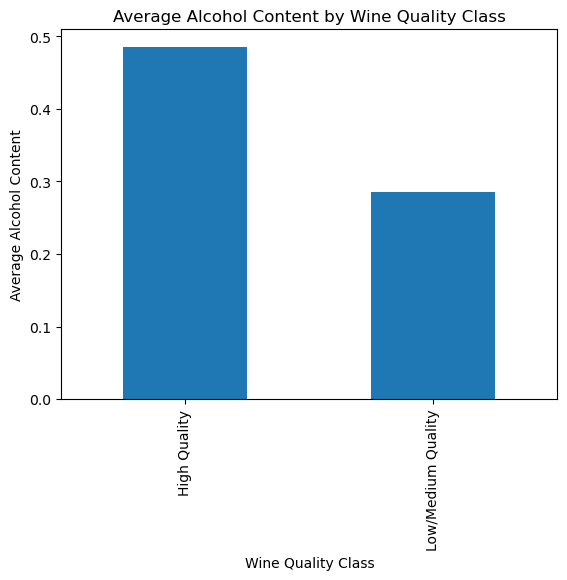

In [18]:
# graphical representation of the average alcohol content by quality class
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df_avg_alcohol.plot(kind='bar', x='quality_class', y='avg_alcohol', legend=False)
plt.title('Average Alcohol Content by Wine Quality Class')
plt.xlabel('Wine Quality Class')
plt.ylabel('Average Alcohol Content')

In [19]:
#push code to GitHub in branch 'mthree-c422-nilay
!git init'
# !git remote add origin
# !git add .
# !git commit -m "ETL Lab Exercise: Wine Quality Dataset"
# !git push origin mthree-c422-nilay


git: 'init'' is not a git command. See 'git --help'.

The most similar command is
	init
